**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Job search model](#toc1_)    
- 2. [Problem 2: Fiscal sustainability](#toc2_)    
- 3. [Problem 3: Deferred acceptance algorithm](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import numpy as np
from types import SimpleNamespace
import matplotlib.pyplot as plt

plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})

## 1. <a id='toc1_'></a>[Problem 1: Job search model](#toc0_)

Consider an unemployed agent searcing for jobs. <br>
There are $K$ jobs, job $k$ pays wage $w_k$. In each period the agent is offered one of the $K$ jobs, the likelihood of being offered job $k$ is $\pi_k$, with $\sum_{k=1}^K\pi_k=1$. <br>
The jobs are ordered by wage, such that $w_1<w_2<\dots<w_K$. <br>
$x^*\in\{1,2\dots,K+1\}$ is the lowest paying job that the person is willing to accept ($x^*=K+1$, means no job is accepted and the job seeker chooses to remain unemployed). <br>

Once a job is accepted the job is kept forever, so the value of employment at a given wage $w_k$ is:

$$
\begin{align*}
V_e(w_k)=\frac{u(w_k)}{1-\beta}
\end{align*}
$$
Where $u(w_k)$ is the utility of wage $w_k$ and $\beta$ is the discount factor. <br>

For a given $x$, and a given value of unemployment in the next period $V_u'$, the current value of umemployment is the utility of the unemployment benefit, $z$, plus the discounted expected value in the next period, which consists of the probability of being offered and accepting a job, times the value of employment at that wage, plus the likelihood of not being a offered job that the agent is willing to accept, times the value of being unemployed in next period. <br>
$$
V_u(x,V_u') = u(z)+ \beta\cdot \left( \sum_{k=x}^{K}\pi_k \cdot V_e(w_k) + V_u'\cdot \sum_{k=1}^{x-1}\pi_k  \right)
$$
$x^*$ is the optimal $x$ to maximize the value of being unemployed: <br>
$$
x^* = \underset{x\in\{1,2\dots,K+1\}}{\arg\max}V_u(x,V_u') 
$$
We specify:
$$
u(c)= \frac{c^{1-\rho}}{1-\rho}
$$

The parameters and the set of $\{w_k\}$ and $\{\pi_k\}$ are given as:

In [2]:
par = SimpleNamespace()
par.K = 100
par.w = np.linspace(1,8,par.K) # set of wage (w_k)
par.pi = np.exp(-par.w*2)/np.sum(np.exp(-par.w*2)) # Set of pi (pi_k)
par.rho = 0.5
par.z = 0.5
par.beta = 0.9
par.tol = 1e-6

**Question 1:** For a given $V_u'=30$, find $x^*$ nummerically, and calculate $V_u(x^*,V_u')$ . <br>

In [3]:
%load_ext autoreload
%autoreload 2
from Problem_1 import DiscreteJobSearchModel

In [4]:
searcher = DiscreteJobSearchModel(**par.__dict__)
par = searcher.par
sol = searcher.sol
searcher.find_x(30,printit=True)

Vu = 28.6242
x =  19


There exists a unique value of $V_u'$, let's call it $V_u^*$,  that ensures that the current value of unemployment is equal to the value in the next period: $V_u^*=V_u(x^*,V_u^*)$. <br>
To find that value, we can use 2 tricks: <br>
First, the optimization over $x$ can be written out of the problem by using the fact that: <br>
$$
\begin{align*}
V_u(x^*,V_u') &= u(z)+ \beta\cdot \left( \sum_{k=x^*}^{K}\pi_k \cdot V_e(w_k) + V_u'\cdot \sum_{k=1}^{x^*-1}\pi_k  \right) \\
\Rightarrow V_u(x^*,V_u') = V_u(V_u') &=  u(z)+ \beta\cdot \left( \sum_{k=1}^{K}\pi_k \cdot \max\left\{V_e(w_k), V'_u\right\} \right)
\end{align*}
$$

Secondly, for finding the the value of $V_u^*$, a simple algorithm can be used: <br>
1. Start by setting $V_u'=0$
1. Calculate $V_u(V_u')$
1. If $\left|V_u(V_u')-V_u'\right|>\text{tol}$ set $V_u'=V_u(V_u')$ and go back to step 2. <br>
1. $V_u^*\approx V_u \approx V_u'$ is found. <br>

**Question 2:** For $z\in[0,4]$, solve for $V_u^*$ and plot it across $z$<br>
Then find $x^*$ and the following value $S$: 
$$
S = \beta \cdot \sum_{k=x^*}^{K}\pi_k \cdot V_e(w_k)
$$
And plot both across $z$

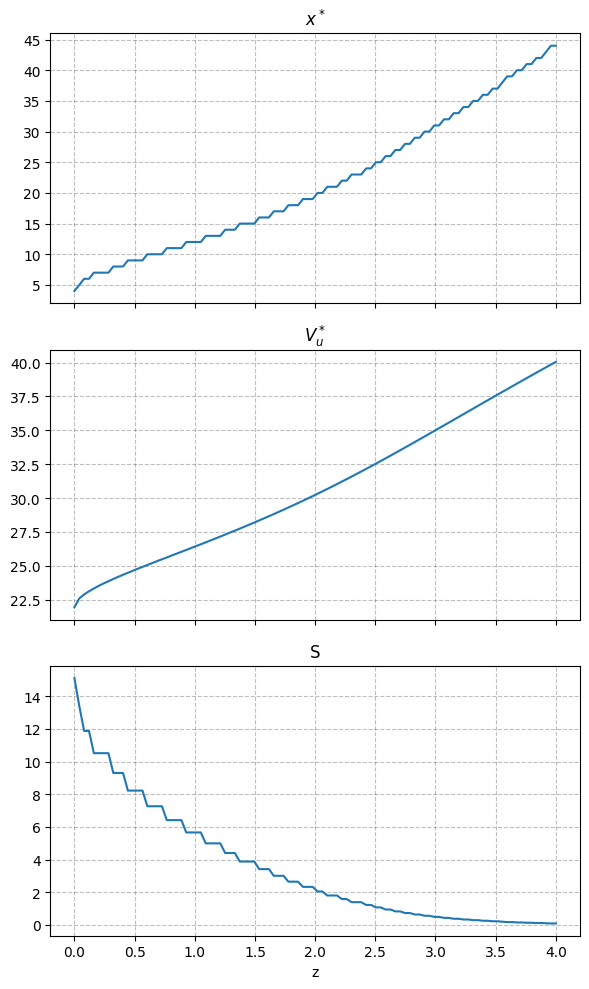

In [5]:
searcher.plot_sol_across_z()

Consider an updated version of the model where the job seeker can use search effort, $e$, to alter the offered job distribution. More search effort will increase the likelihood of being offered a high paying job, but it also directly hurts utility. <br>
$$
V_u(e,x,V_u') = u(z- e)+ \beta\cdot \left( \sum_{k=x}^{K}\pi(w_k,e) \cdot V_e(w_k) + V_u'\cdot \sum_{k=1}^{x-1}\pi(w_k,e)  \right)
$$
Where optimal values $e^*,x^*$ for a given $V_u'$ are:
$$
x^*,e^* = \arg\max_{x\in\{1,2\dots,K+1\}, e\in[0,z)}V_u(e,x,V_u')
$$
We specify the following functional form for $\pi(w_k,e)$:
$$ 
\pi(w,e) = \frac{\exp(-\frac{w}{\frac{1}{2}+e})}{\sum_{k=1}^{K}\exp(-\frac{w_k}{\frac{1}{2}+e})}
$$ 
$V_e(w_k)$ is the same as before.

**Question 3:** <br>
a) Plot $\pi(w,e)$ across $w\in[1,8]$ for $e\in\{0,0.2,0.5,1,2,10\}$. <br>
b) Solve for $x^*,e^*$ for a given $V_u'=30$. <br>

*Tip for b): You can solve for $x^*$ and $e^*$ by first creating a function that solves for $x^*$, given $e$, and returns the objective for the given $e$ and $x^*$, and then solves for $e^*$ by maximizing that function.*

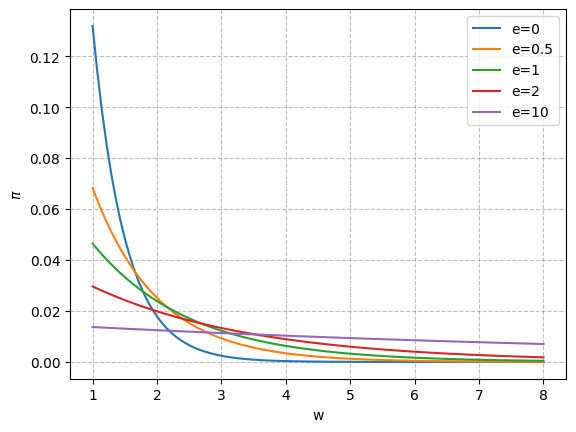

In [6]:
fig, ax = plt.subplots()

for e in [0,0.5,1,2,10]:
    ax.plot(par.w,searcher.pi_func(e),label=f'e={e}')

ax.set_xlabel('w')
ax.set_ylabel(r'$\pi$')
ax.legend();

In [7]:
searcher.find_x_e(Vu_new=30,printit=True)

Vu = 28.7489
x =  19
e =  0.3669


Again we can rewrite: 
$$
\begin{align*}
V_u(e,x^*,V_u')  &= u(z- e)+ \beta\cdot \left( \sum_{k=x^*}^{K}\pi(w_k,e) \cdot V_e(w_k) + V_u'\cdot \sum_{k=1}^{x^*-1}\pi(w_k,e)  \right) \\
\Rightarrow V_u(e,x^*,V_u') &= V_u(e,V_u') = u(z- e)+ \beta\cdot \left( \sum_{k=1}^{K}\pi(w_k,e) \cdot \max\left\{ V_e(w_k), V_u' \right\} \right)
\end{align*}
$$
With:
$$
e^* = \arg\max_{e\in[0,z)} V_u(e,V_u')

$$


Now $V_u^*$ can be found by the following procedure: <br>
1. Start by setting $V_u'=0$
1. Find $e^*$ given $V_u'$ and calculate $V_u(e^*,V_u')$
1. If $\left|V_u(e^*,V_u')-V_u'\right|>\text{tol}$ set $V_u'=V_u(e^*,V_u')$ and go to step 2. <br>
1. $V_u^*\approx V_u(e^*,V_u') \approx V_u'$ is found. <br>

**Question 4:** <br>
For $z\in[0,4]$, solve for $V_u^*$ in the new model and plot it across $z$<br>
Then find $x^*$, $e^*$ and the following value $S$: 
$$
S = \beta \cdot \sum_{k=x^*}^{K}\pi(w_k,e^*) \cdot V_e(w_k)
$$
And plot them across $z$. <br>
In the plots, compare with the values from question 2. <br>

In [8]:
searcher.solve_bellman(print_iter=True,model2=True)

Iter   0:  Vu = 24.7386, e = 0.4674
Iter   1:  Vu = 25.8174, e = 0.4535
Iter   2:  Vu = 26.2893, e = 0.4458
Iter   3:  Vu = 26.5182, e = 0.4415
Iter   4:  Vu = 26.6342, e = 0.4392
Iter   5:  Vu = 26.6930, e = 0.4380
Iter   6:  Vu = 26.7236, e = 0.4373
Iter   7:  Vu = 26.7401, e = 0.4370
Iter   8:  Vu = 26.7489, e = 0.4368
Iter   9:  Vu = 26.7536, e = 0.4367
Iter  10:  Vu = 26.7561, e = 0.4367
Iter  11:  Vu = 26.7575, e = 0.4366
Iter  12:  Vu = 26.7582, e = 0.4366
Iter  13:  Vu = 26.7586, e = 0.4366
Iter  14:  Vu = 26.7588, e = 0.4366
Iter  15:  Vu = 26.7589, e = 0.4366
Iter  16:  Vu = 26.7590, e = 0.4366
Iter  17:  Vu = 26.7590, e = 0.4366
Iter  18:  Vu = 26.7590, e = 0.4366
Iter  19:  Vu = 26.7591, e = 0.4366
Iter  20:  Vu = 26.7591, e = 0.4366
Iter  21:  Vu = 26.7591, e = 0.4366
Iter  22:  Vu = 26.7591, e = 0.4366
Iter  23:  Vu = 26.7591, e = 0.4366


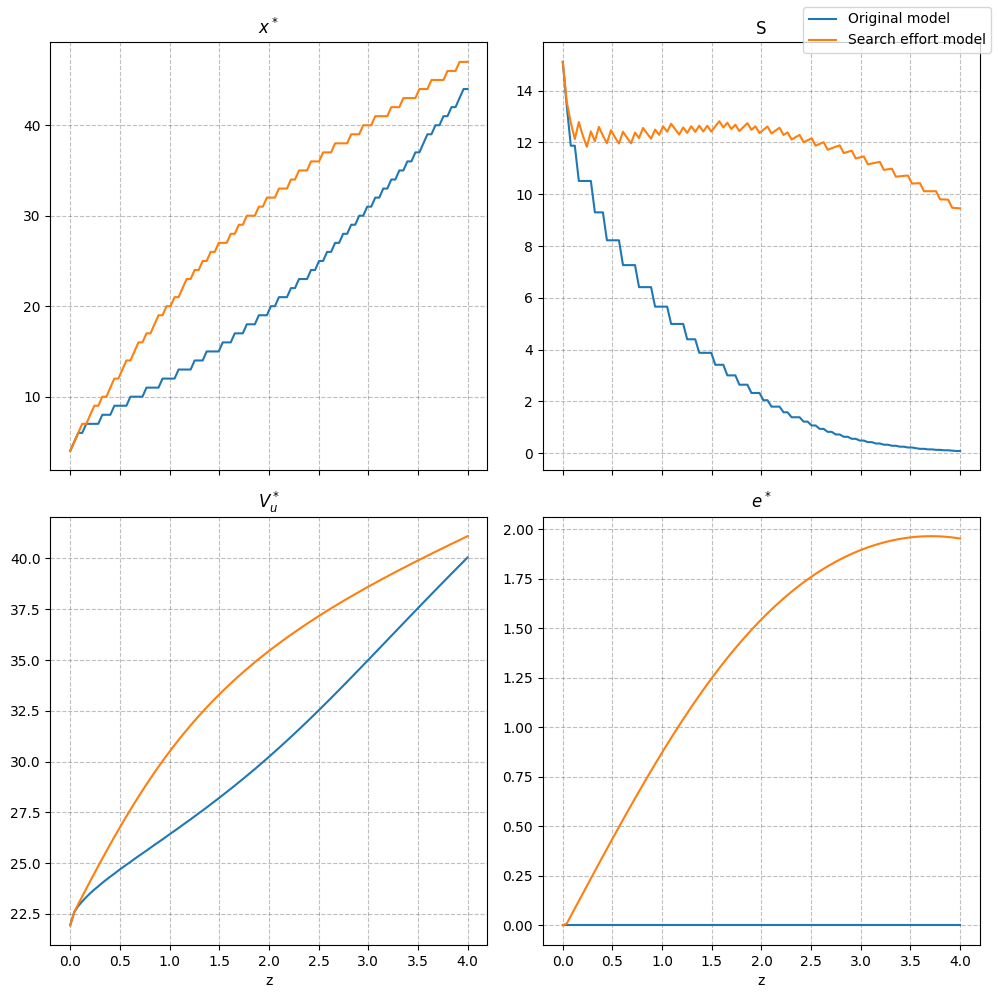

In [9]:
searcher.plot_sol_across_z(model2=True)

## 2. <a id='toc2_'></a>[Problem 2: Fiscal sustainability](#toc0_)

Consider the following model of fiscal sustainability:

$$
\begin{align*}
Y_{t+1}	&=(1+g)Y_{t}\\
B_{t+1}	&=(1+r)B_{t}+PD\cdot Y_t\\
b_{t}	&=\frac{B_{t}}{Y_{t}}\\
\end{align*}
$$

where $Y_{t}$ is GDP with growth rate $g$, $B_{t}$ is government bonds, $PD\in[0,1]$ is the primary deficit relative to GDP, and $b_{t}$ is the debt to GDP ratio.

Fiscal sustainability is defined as $\lim_{t\rightarrow\infty}b_{t}\rightarrow b_{ss}<\infty$. 

**Question 1:** Set $Y_{0}=1$, $B_{0}=0$, $g=0.02$ and $r=0.04$. Write code for simulating the model, how would you test for fiscal sustainability in your simulation? For which values of $PD$ is the fiscal policy sustainable?

In [10]:
from Problem_2 import FSModel

In [11]:
FS = FSModel()
par = FS.par 
sim = FS.sim

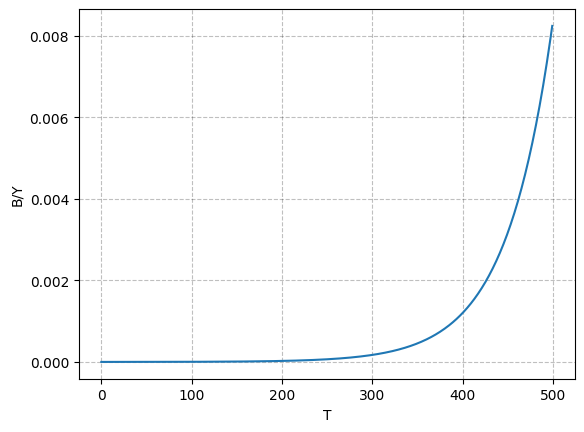

In [12]:
# Even for extremely small values of PD, debt is not sustainable in the long run
par.PD = 1e-8
FS.simulate()
FS.plot_b()

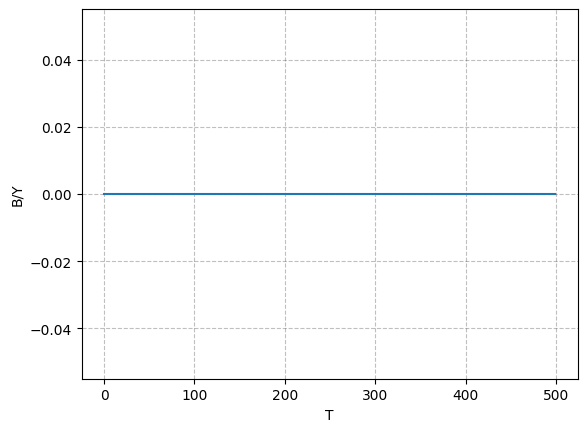

In [13]:
par.PD = 0.0
FS.simulate()
FS.plot_b()

**Question 2:** Set $Y_{0}=1$, $B_{0}=0$, $g=0.02$ and $r=0.00$. For which values of $PD$ is the fiscal policy sustainable? What if we also require $b_t < 2\,\forall t$  for sustainability?

In [14]:
FS.par.r = 0.00

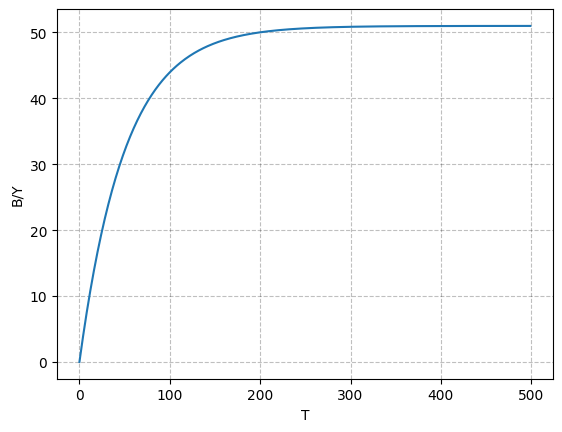

In [15]:
FS.par.PD = 1.0 # No matter how high PD is, b will always stabilize at some level
FS.simulate()
FS.plot_b()

In [16]:
PD = FS.find_PD_limit_max_value(max_value=2.0)
print(f'{PD = :.3f}')

PD = 0.039


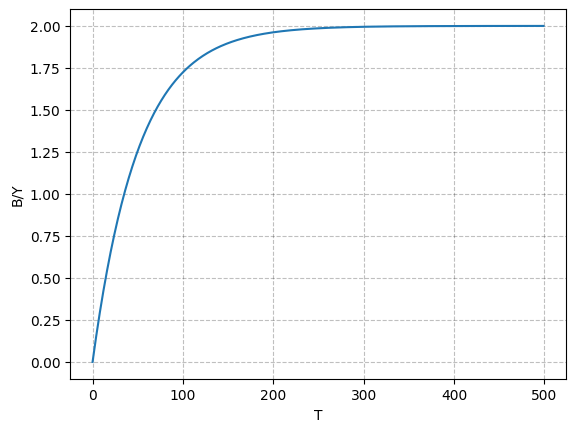

In [17]:
FS.par.PD = PD
FS.simulate()
FS.plot_b()

Consider a stochastic version of the model above

$$
\begin{align*}
Y_{t+1}	&= (1+g_{t})Y_{t}\\
B_{t+1}	&=\left(1+ r_t \right)B_{t}+PD \cdot Y_t\\
b_{t}	&=\frac{B_{t}}{Y_{t}}\\
r_{t}	&= \exp ( \epsilon^r_{t} ) -1  + \nu b_t^2\\
g_{t}   &= \exp ( \epsilon^g_{t} )-1 \\
\epsilon^g_{t} 	&\sim\mathcal{\mathcal{N}}(\mu_{g},\sigma_{g}^{2})\\
\epsilon^r_{t}	&\sim\mathcal{\mathcal{N}}(\mu_{r},\sigma_{r}^{2})\\
\end{align*}
$$

where $\nu$ measure the interest rate sensivity. <br>
We have $Y_{0}=1$, $B_{0}=0$, $\mu_{g}=0.02$, $\sigma_{g}=0.02$, $\mu_{r}=0.00$, $\sigma_{r}=0.02$ and $\nu = 0.001$.

We now define the *probability of fiscal sustainabilit*y as the probability of always having $b_t < 2$ for $t < 500$. 

**Question 3**: What is the probability of fiscal sustainability as function of $PD$?

In [18]:
seed  = 12345
rng = np.random.default_rng(seed)
FS.simulate_stochastic(rng)

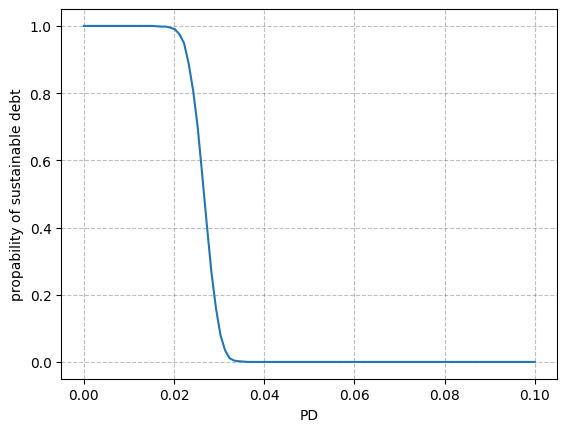

In [19]:
ax = FS.plot_sustainable_probability()

**Question 4:** Introduce and implement an extension of the model to make the fiscal sustainability analysis more interesting.

This question is open-ended and there is no right answer. The goal is to see how you think about the problem and how you can extend the model to make it more realistic. It should be noted that changing the value of the parameters does not count as an extension of the model. One idea could be to allow both the public deficit and the interest rate to affect the growth rate:
$$
\begin{align*}
Y_{t+1}	&= (1+g_{t})Y_{t}\\
B_{t+1}	&=\left(1+ r_t \right)B_{t}+PD \cdot Y_t\\
b_{t}	&=\frac{B_{t}}{Y_{t}}\\
r_{t}	&= \exp ( \epsilon^r_{t} ) -1  + \nu b_{t}^{2}\\
g_{t}   &= \exp ( \epsilon^g_{t} )-1 - \xi (r_{t}- \mu_{r}) + \kappa_1 \left( PD\right)^{\kappa_2} \ \\
\epsilon^g_{t} 	&\sim\mathcal{\mathcal{N}}(\mu_{g},\sigma_{g}^{2})\\
\epsilon^r_{t}	&\sim\mathcal{\mathcal{N}}(\mu_{r},\sigma_{r}^{2})\\
\end{align*}
$$

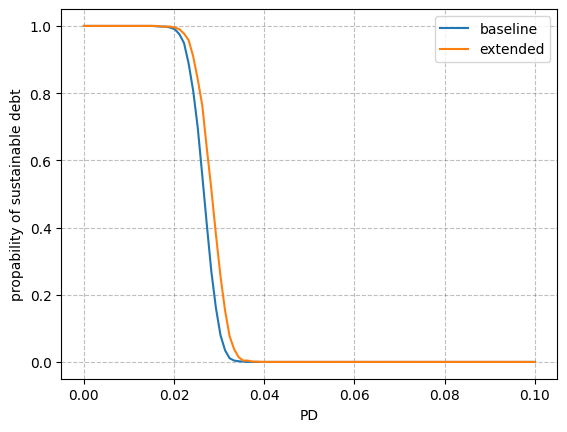

In [20]:
ax = FS.plot_sustainable_probability(show=False,label="baseline")
ax = FS.plot_sustainable_probability(extended=True,label="extended",show=False,ax=ax)
ax.legend();

## 3. <a id='toc3_'></a>[Problem 3: Deferred acceptance algorithm](#toc0_)

Consider a matching problem with students and mentors. <br>
There are $S$ students, $s_1,s_2,\dots s_S$ and $M$ mentors $m_1,m_2,\dots m_M$  <br>
All have preferences over each other, meaning student $s_i$ gets utility $u_{s_i}(m_j)$ from working with mentor $m_j$ and mentor $m_j$ gets utility $u_{m_j}(s_i)$ from mentoring student $s_i$. <br>
Their preferences are independent of each other, $u_{s_i}(m_j)\sim U[0,1],\;u_{m_j}(s_i)\sim U[0,1]$.<br>
They all don't want to work alone, meaning $u_{s_i}(Ø) = u_{m_j}(Ø) = 0$, and can only work with one single person. <br>
A matching prescribes a mapping between students and mentors such that all students and mentors either have a unique partner or are unmatched. <br>
It can be defined as a function $\mu$ that uniquely maps students to mentors and mentors to students. <br>
$$
\begin{align*}
    \mu(a) = \begin{cases}
        m_j & \text{if } a \text{ is matched to } m_j \\
        s_i & \text{if } a \text{ is matched to } s_i \\
        Ø & \text{if } a \text{ is unmatched}
    \end{cases}
\end{align*}
$$
For all $a\in \left\{s_1,s_2,\dots s_S,m_1,m_2,\dots m_M\right\}$. <br>
For a given matching, a *blocking pair* is a pair $(s_i,m_j)$ such that $s_i$ and $m_j$ are not matched to each other in the matching, but both prefer each other to their current partners. Meaning that $u_{s_i}(m_j) > u_{s_i}(\mu(s_i))$ and $u_{m_j}(s_i) > u_{m_j}(\mu(m_j))$ would identify a blocking pair. <br>
A *stable matching* is a matching with no blocking pairs. <br>

**Deffered Acceptance Algorithm (DAA)**<br>
DAA is an algorithm that finds a stable matching. <br>
One of the groups proposes to members of the other group, and members of the other group considers the offers they have received. This continues in a loop until a stable matching is found. <br>
We will call the proposing group $P$ and the receiving group $R$.  <br>
If the students propose, then we say $S=P$ with $s_i=p_i\forall i$, and $M=R$ with $m_j=r_j \forall j$, and vice versa.

The algorithm is as follows:

1. All $p_i$ who do not have an outstanding offer, (because it is the first round, or because their offer was rejected in the previous round) propose to the $r_j$ whom they prefer the most, among those that have not rejected them yet. If they have been rejected by all $r_j$ they remain unmatched. <br>
    If all $p_i$ either have an outstanding offer or have been rejected by all $r_j$, then go to step 4. <br>

1. If a $r_j$ has one offer, they hold on to that offer. <br>
    If a $r_j$ has more than one offer (including the offer they might have held on to), they hold on to their favorite offer and reject the rest. <br>

1. Go back to step 1. <br>

1. The resulting matching is stable. <br>



The below code should help you get started, read through it and make sure you understand it. Then make the changes necessary to answer the questions. (Feel free to move it into a .py-file)

In [21]:
from Problem_3 import MatchingModel

In [22]:
# Setup
np.random.seed(2000)

# Initiate the model and simulate preferences
Mmodel = MatchingModel(M=7,S=7)
par = Mmodel.par
Mmodel.simulate_preferences()

In [23]:
# Print the current prescribed matching
Mmodel.print_matching()

Matching
Students:
Person 1 works alone
Person 2 works alone
Person 3 works alone
Person 4 works alone
Person 5 works alone
Person 6 works alone
Person 7 works alone

Mentors
Person 1 works alone
Person 2 works alone
Person 3 works alone
Person 4 works alone
Person 5 works alone
Person 6 works alone
Person 7 works alone
{(s:m)} : {(None,1), (None,2), (None,3), (None,4), (None,5), (None,6), (None,7), }


In [24]:
# Check whether the current matching is stable
Mmodel.check_matching()

Error: student 1 and mentor 1 is a blocking pair


It is not stable because nobody has a partner, and everybody would prefer working with somebody as opposed to alone

In [25]:
# We can loop through all students and get the id of the mentor they would want to offer to first
offers = [s.next_offer() for s in par.S_list]
for i, offer in enumerate(offers):
    print(f'Student {i+1} offers to mentor {offer+1}')

Student 1 offers to mentor 1
Student 2 offers to mentor 7
Student 3 offers to mentor 2
Student 4 offers to mentor 7
Student 5 offers to mentor 7
Student 6 offers to mentor 6
Student 7 offers to mentor 4


In [26]:
# For given list of offers we can then see the mentors reaction
m7 = par.M_list[6]
choice = m7.react_to_offer(offers,printit=True)
print(f'm7 chooses to hold on to the offer from student {choice+1}')

Offer from 2 is 7
Utility: 0.8465 vs 0.0000
Accepting offer from 2 so far
Offer from 4 is 7
Utility: 0.2627 vs 0.8465
Offer from 5 is 7
Utility: 0.9927 vs 0.8465
Accepting offer from 5 so far
m7 chooses to hold on to the offer from student 5


In [27]:
# We can then tell student 5 that they have an outstanding offer from mentor 7
s5 = par.S_list[4]
s5.partner = 6

# And see our new current matching
Mmodel.print_matching()

Matching
Students:
Person 1 works alone
Person 2 works alone
Person 3 works alone
Person 4 works alone
Person 5 works with 7
Person 6 works alone
Person 7 works alone

Mentors
Person 1 works alone
Person 2 works alone
Person 3 works alone
Person 4 works alone
Person 5 works alone
Person 6 works alone
Person 7 works with 5
{(s:m)} : {(None,1), (None,2), (None,3), (None,4), (None,5), (None,6), (5,7), }


In [28]:
# We can reset all persons
Mmodel.reset()
Mmodel.print_matching()

Matching
Students:
Person 1 works alone
Person 2 works alone
Person 3 works alone
Person 4 works alone
Person 5 works alone
Person 6 works alone
Person 7 works alone

Mentors
Person 1 works alone
Person 2 works alone
Person 3 works alone
Person 4 works alone
Person 5 works alone
Person 6 works alone
Person 7 works alone
{(s:m)} : {(None,1), (None,2), (None,3), (None,4), (None,5), (None,6), (None,7), }


**Question 1:** Use DAA to find the stable matching when students propose. <br>

In [29]:
Mmodel.DAA()

Starting DA algorithm
Current matching: [(0, 0), (2, 1), (None, 2), (6, 3), (None, 4), (5, 5), (4, 6)]
Round 2
Current matching: [(0, 0), (2, 1), (None, 2), (6, 3), (None, 4), (5, 5), (4, 6)]
Round 3
Current matching: [(0, 0), (2, 1), (3, 2), (6, 3), (None, 4), (5, 5), (4, 6)]
Round 4
Current matching: [(0, 0), (1, 1), (3, 2), (6, 3), (None, 4), (5, 5), (4, 6)]
Round 5
Current matching: [(0, 0), (1, 1), (3, 2), (6, 3), (None, 4), (5, 5), (4, 6)]
Round 6
Current matching: [(0, 0), (1, 1), (3, 2), (6, 3), (2, 4), (5, 5), (4, 6)]
Round 7
All proposers have an outstanding offer
Matching
Students:
Person 1 works with 1
Person 2 works with 2
Person 3 works with 5
Person 4 works with 3
Person 5 works with 7
Person 6 works with 6
Person 7 works with 4

Mentors
Person 1 works with 1
Person 2 works with 2
Person 3 works with 4
Person 4 works with 7
Person 5 works with 3
Person 6 works with 6
Person 7 works with 5
{(s:m)} : {(1,1), (2,2), (4,3), (7,4), (3,5), (6,6), (5,7), }


In [30]:
Mmodel.sol

namespace(S_DAA=[(0, 0), (1, 1), (3, 2), (6, 3), (2, 4), (5, 5), (4, 6)])

**Question 2:** Use DAA to find the stable matching when mentors propose. <br>

In [31]:
Mmodel.DAA(proposers='M')

Starting DA algorithm
Current matching: [(0, 0), (None, 1), (None, 2), (1, 3), (5, 4), (6, 5), (4, 6)]
Round 2
Current matching: [(0, 0), (3, 1), (1, 2), (None, 3), (5, 4), (6, 5), (4, 6)]
Round 3
Current matching: [(0, 0), (3, 1), (1, 2), (2, 3), (5, 4), (6, 5), (4, 6)]
Round 4
All proposers have an outstanding offer
Matching
Students:
Person 1 works with 1
Person 2 works with 3
Person 3 works with 4
Person 4 works with 2
Person 5 works with 7
Person 6 works with 5
Person 7 works with 6

Mentors
Person 1 works with 1
Person 2 works with 4
Person 3 works with 2
Person 4 works with 3
Person 5 works with 6
Person 6 works with 7
Person 7 works with 5
{(s:m)} : {(1,1), (4,2), (2,3), (3,4), (6,5), (7,6), (5,7), }


**Question 3:** Find all other stable matches. <br>
*Hint: Everybody prefers working with somebody as opposed to alone, this means that no one will be alone in a stable matching, because both groups are equal in size.*

In [32]:
Mmodel.find_all_stable_matches()

{(1,1), (2,2), (4,3), (7,4), (3,5), (6,6), (5,7)}
{(1,1), (4,2), (2,3), (3,4), (6,5), (7,6), (5,7)}
{(1,1), (4,2), (2,3), (7,4), (3,5), (6,6), (5,7)}


**Questions 4:** Calculate the average utility of students and mentors seperately in each stable matching, and compare with those found using DAA.


In [33]:
Mmodel.calculate_utility()

DAA, S proposes: -> S: 0.6497, M: 0.6111
DAA, M proposes: -> S: 0.4373, M: 0.8903
{(1,1), (4,2), (2,3), (7,4), (3,5), (6,6), (5,7)} -> S: 0.6242, M: 0.7176
